In [103]:
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install pandas



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

In [59]:
#Read clean kaggle dataset
raw_df = pd.read_csv("clean_kaggle_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Part 1 Exploratory Data Analysis

##Description of DataFrames

In [60]:
#Looking at the dataset
raw_df.head(2)

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [61]:
#Reviewing the salary column as it is one of the main focuses of the analysis
raw_df["Q25"].describe()

count      15391.000000
mean       49116.009356
std        98090.207788
min         1000.000000
25%         2000.000000
50%        15000.000000
75%        60000.000000
max      1000000.000000
Name: Q25, dtype: float64

In [62]:
raw_df[raw_df["Q2"] == "Woman"]["Q25"].describe()

count       2482.000000
mean       34816.881547
std        72017.347888
min         1000.000000
25%         1000.000000
50%         7500.000000
75%        50000.000000
max      1000000.000000
Name: Q25, dtype: float64

In [63]:
raw_df[raw_df["Q2"] == "Man"]["Q25"].describe()

count      12642.000000
mean       51193.600696
std        99979.274378
min         1000.000000
25%         2000.000000
50%        20000.000000
75%        60000.000000
max      1000000.000000
Name: Q25, dtype: float64

We note our dataset is unbalanced. There were 2482 women and 12642 men who elected to respond to the kaggle survey. 

In addition we note that the salary columns for both men and women contain entries which state that their yearly compensation is on the order of $1 million/year. These may be unrealistic or erroneous responses. For the moment we shall leave them in as we consider histograms of the data, considering that they may perhaps be in reference to CEOs.

We note also that the salary data seems very left skewed as the standard deviation is much greater than the mean and median.

##Data Validity (Null Entries etc.)

In [64]:
#We wish to consider the distribution of Country, Age, Education, Profession, Years Coding, and Salary
df = pd.DataFrame(data = raw_df.loc[:,["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q25"]])
df.columns = ["Age_Range", "Gender","Country","Education","Profession", "Years_Programming", "Salary" ]

In [65]:
#Check for null entries in our restricted dataset
df.isna().sum()

Age_Range            0
Gender               0
Country              0
Education            0
Profession           0
Years_Programming    0
Salary               0
dtype: int64

In [66]:
#Specifying the sort order for columns
df["Years_Programming"] = pd.Categorical(df["Years_Programming"], ["I have never written code","< 1 years","1-3 years",\
                                                                   "3-5 years","5-10 years", "10-20 years", "20+ years"])

education_categories = ["I prefer not to answer", "No formal education past high school","Some college/university study without earning a bachelor’s degree", "Bachelor’s degree","Master’s degree", "Doctoral degree", "Professional doctorate"]
df["Education"] = pd.Categorical(df["Education"], education_categories)

## Histograms


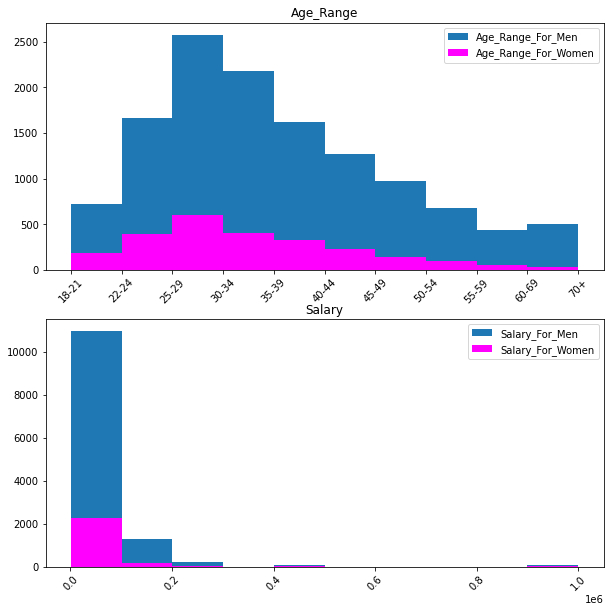

In [67]:
#Plot histograms of some of the relevant features (By Gender)

#Selecting features
features_1 = ["Age_Range", "Salary"]


fig, axes = plt.subplots(nrows = len(features_1), figsize = (10,10))


for  index,column in enumerate(features_1):
  #axes[index].hist(df[column].sort_values(), label = column, color = "green")
  axes[index].hist(df[df["Gender"]== "Man"].loc[:,column].sort_values(), label = column + "_For_Men")
  axes[index].hist(df[df["Gender"]== "Woman"].loc[:,column].sort_values(), label = column + "_For_Women", color = "magenta")
  axes[index].legend()
  axes[index].set_title(column)

  for tick in axes[index].get_xticklabels():
    tick.set_rotation(45)

 

##Trends

Text(0.5, 1.0, 'Mean Salary by Education Level')

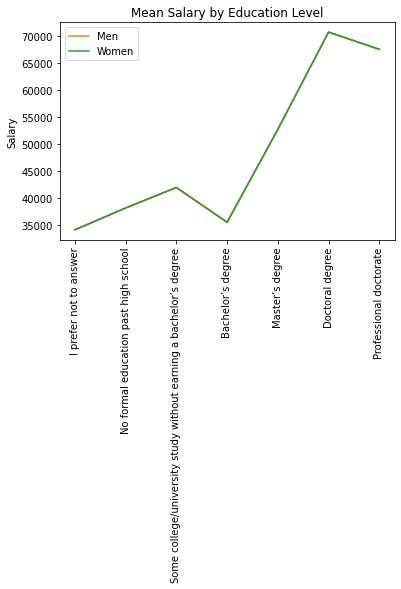

In [68]:
#Mean Salary by Education
plt.plot(df[["Education","Salary"]].groupby("Education").mean().index, df[["Education","Salary"]].groupby("Education").mean() )
plt.plot(df[df["Gender"]=="Man"][["Education","Salary"]].groupby("Education").mean().index, df[["Education","Salary"]].groupby("Education").mean() , label = "Men")
plt.plot(df[df["Gender"]=="Woman"][["Education","Salary"]].groupby("Education").mean().index, df[["Education","Salary"]].groupby("Education").mean(), label = "Women" )
plt.xticks(rotation=90)
plt.legend()
plt.ylabel("Salary")
plt.title("Mean Salary by Education Level")


Text(0.5, 1.0, 'Mean Salary by Gender Level')

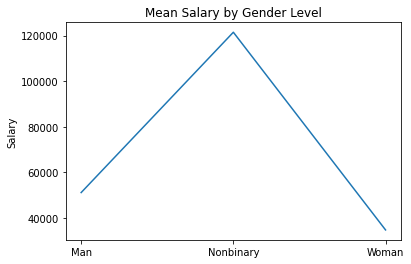

In [69]:
#Mean Salary by Gender
temp_df = df[(df["Gender"] == "Man") | (df["Gender"] == "Woman") | \
             (df["Gender"] == "Nonbinary") ][["Gender","Salary"]].groupby("Gender").mean()

plt.plot(temp_df.index,temp_df )
#plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.title("Mean Salary by Gender Level")

Text(0.5, 1.0, 'Mean Salary by Age Range')

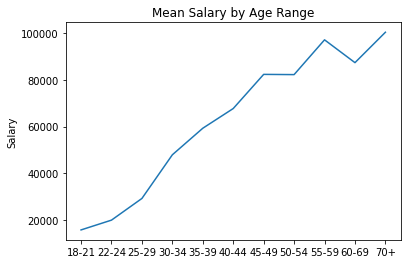

In [70]:
#Mean Salary by Age
temp_df = df[["Age_Range","Salary"]].groupby("Age_Range").mean()

plt.plot(temp_df.index,temp_df )
#plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.title("Mean Salary by Age Range")

## Box Plots

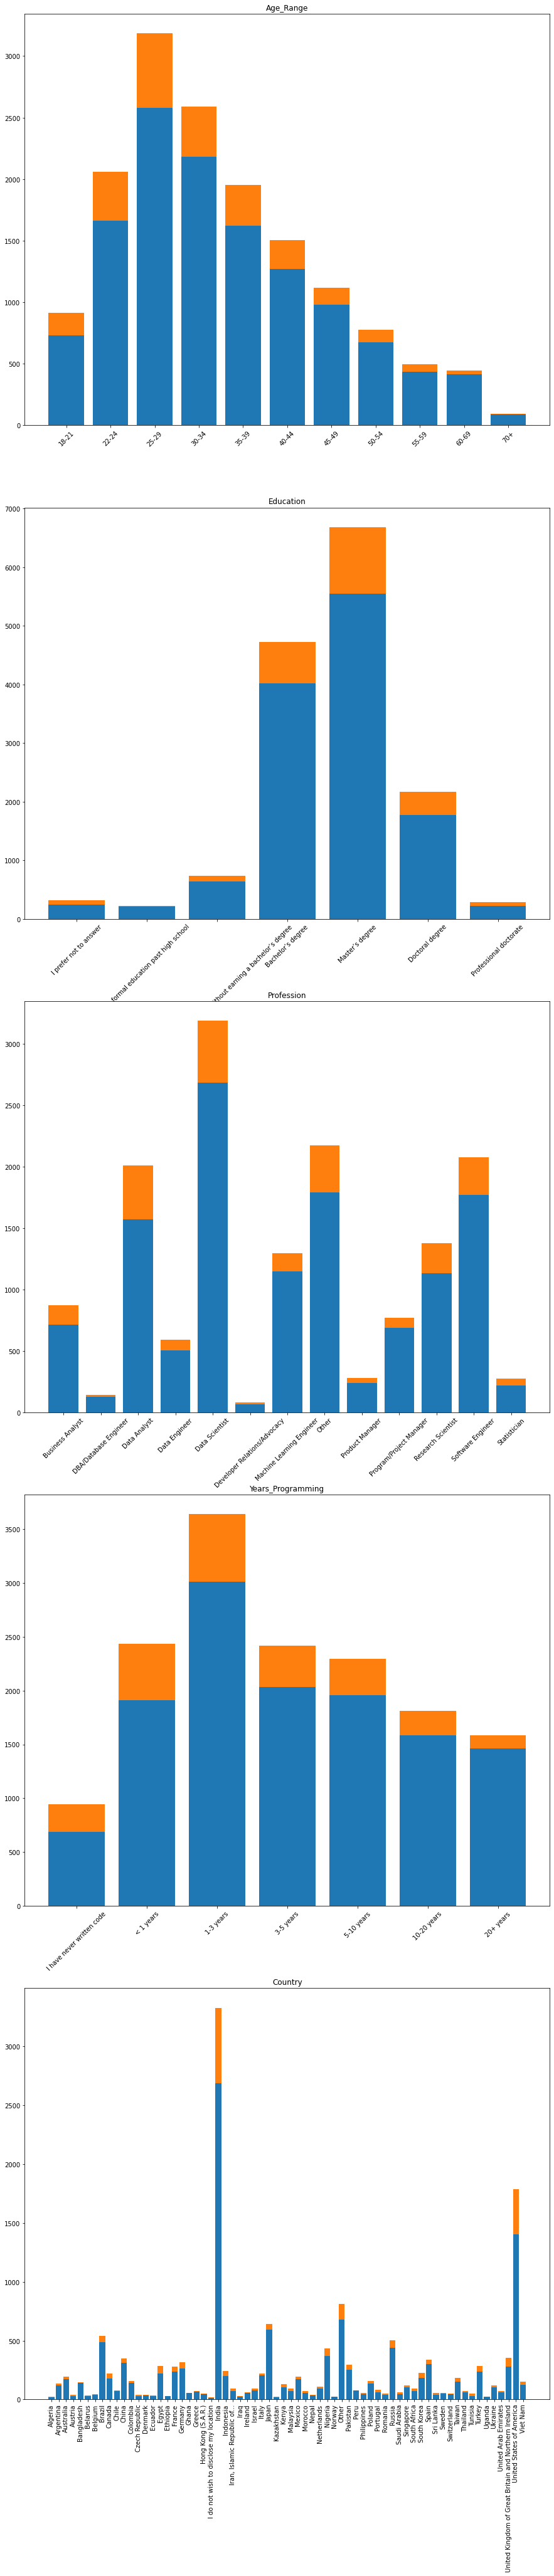

In [71]:
#Now onto box plots separated by gender
box_list = ["Age_Range","Education","Profession", "Years_Programming", "Country"]

fig, axes = plt.subplots(nrows = len(box_list), figsize = (15,70))


for  index,column in enumerate(box_list):
  temp_df_m = df[df["Gender"]== "Man"].groupby(column).count().loc[:,"Gender"]
  temp_df_w = df[df["Gender"]== "Woman"].groupby(column).count().loc[:,"Gender"]
  axes[index].bar(temp_df_m.index, temp_df_m)
  axes[index].bar(temp_df_w.index, temp_df_w, bottom = temp_df_m)
  axes[index].set_title(column)

  if column == "Country":
    for tick in axes[index].get_xticklabels():
      tick.set_rotation(90)
  else:
    for tick in axes[index].get_xticklabels():
      tick.set_rotation(45)

   



Note - Frequency of Countries has a wide spread though US and India contribute a large proportionto the data. Age groups are faily balanced and profession is somewhat random.

Text(0.5, 1.0, 'Country')

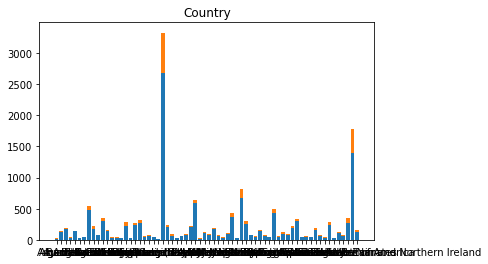

In [72]:
  column = "Country"
  temp_df_m = df[df["Gender"]== "Man"].groupby(column).count().loc[:,"Gender"]
  temp_df_w = df[df["Gender"]== "Woman"].groupby(column).count().loc[:,"Gender"]
  plt.bar(temp_df_m.index, temp_df_m)
  plt.bar(temp_df_w.index, temp_df_w, bottom = temp_df_m)
  plt.title(column)

#Part 2 Comparing Men and Women's Salaries

In [73]:
#Compute and report descriptive statistics for each group
man_df = df[df["Gender"] == "Man"].loc[:, "Salary"]
woman_df = df[df["Gender"] == "Woman"].loc[:, "Salary"]

print("The average salary for men was $%.2f with a standard deviation of $%.2f. Sample size: %d men." % (man_df.mean(),\
                                                                                                       man_df.std(), man_df.count()))
print("The average salary for women was $%.2f with a standard deviation of $%.2f. Sample size: %d women." % (woman_df.mean(),\
                                                                                                         woman_df.std(), woman_df.count()))

The average salary for men was $51193.60 with a standard deviation of $99979.27. Sample size: 12642 men.
The average salary for women was $34816.88 with a standard deviation of $72017.35. Sample size: 2482 women.


Parameter|Women's Salary|Men's Salary
---|---|---
count|2482| 12642
mean| 34816.88| 51193.60
std | 72017.35| 99979.27
min | 1000 | 1000
median| 12630| 20000
max | 1000000| 1000000


## Two Sample t-Test

The t-test is a statistical test that compares the means of two populations by generating a test statistic based on the data, and comparing it to the general t-distribution.

The standard Two sample t-test (Student's t) assumes that:


*   The distributions being sampled from are normal
*   The samples used are randomly selected
*   The variance of the distributions being compared are similar

The pooled variance t-test (Welch's t), can be used to compare with unequal variances.



The sampled salary data for men and women is fairly unbiased. It is not completely random as it suffers from self-selction bias in the responders. the use of kaggle users is suitable for comparing the salaries of data science professionals.

The standard deviations (and thus variances) do not differ too greatly as they have a similar order of magnitude, however the samples in each group are of a different size so statistical tests must be used to compare the variance. 

The distributions are very left skewwed and non-normal which violates the assumption for the t-test. A more appropriate test may be any of the statistical tests for comparison of lognormal or gamma distributions. The data could also be transformed to obtain a more normal distribution. ie, by taking the log of the data.

Though the t-test can be robust against non-normality, the fact that the standard deviation is roughly double the mean for both distributions and the extremely long tail containing possible outliers makes it difficult to justify using the t-test. Therefore the two-sample t-test shall be considered unsuitable for comparing the raw data.

In [74]:
#Statistical test for equality of variance
stats.levene(man_df, woman_df)

LeveneResult(statistic=47.0171552949757, pvalue=7.309414887535396e-12)

Levene's test is applied to determine if the variances for the groups are statistically similar. For our data with (2 groups, 15000 samples - 2 groups) degrees of freedom, the critical F statistic is 2.3.

The calculated statistic is 47 with a p value near 0. This is greater than our critical F value hence we must reject the hypothesis that the variances are the same.

In [75]:
#Anderson-Darling test for normality
#If test statistic is larger than critical value then reject normality as null
# hypothesis
stats.anderson(man_df, dist='norm')



AndersonResult(statistic=1585.052479559301, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [76]:
stats.anderson(woman_df, dist='norm')

AndersonResult(statistic=330.28183648781123, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Likewise the application of a statistical test for normality shows the data is significantly non-normal.

##Try Lognormal modification

A log transformation was applied to the data in hopes that the distribution was lognormal. Though this improves the normality the data is still significantly non-normal that a normal approximation is unsuitable, as per the Anderson test.

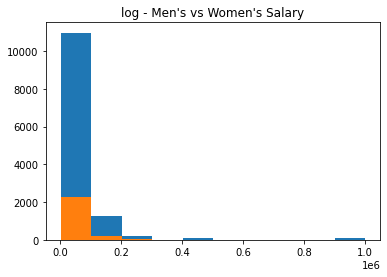

In [77]:
log_man_df = np.log(man_df)
log_woman_df = np.log(woman_df)

plt.hist(man_df, label = "Men's Salary")
plt.hist(woman_df, label = "Women's Salary")
plt.title("log - Men's vs Women's Salary")
plt.show()

In [78]:
log_man_df.describe()
#Std deviation much better with the transformation, but still not normal

count    12642.000000
mean         9.532894
std          1.831579
min          6.907755
25%          7.600902
50%          9.903488
75%         11.002100
max         13.815511
Name: Salary, dtype: float64

In [79]:
stats.anderson(log_man_df, dist='norm')

AndersonResult(statistic=312.6350855367964, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## Bootstrapping a Mean Distribution

By the central limit theorem the distribution of the means of the distribution would be normally distributed with the same mean, but with a reduced variance based on the number of samples (n) used to generate the mean.



*   mu_mean = mu
*   var_mean = var/n
*   std_mean = std/sqrt(n)

The distribution of means can be sample by using bootstrapping - randomly sampling from the current distributions with replacement, and recording the means of each sample. 

To ensure the results are comparable and not affected by the different number of responses between the genders, the same proportion will be sampled from both datasets. 

Sample sizes of 6 are considered the minimum for sampling as a shorthand, but samples on the order of 30 or so are needed to see normality.

Bootstrapped distributions using 6,30,60,200 and 400 samples for women the smaller group will be generated. The sample size for men shall be similar in proportion.


In [80]:
def bootstrapDist(data, sample_size, replications):
  """
  Generates a distribution of the means of data by sampling with
  replacement from data. data is assumed to be a one dimensional
  and numerical array.
  sample_size is the number of samples used to compute each mean.
  replications is the number of points to generate from the
  distribution of means.
  Returns mean_data the sampled mean values
  """

  mean_data = np.zeros(shape = (replications,1))
  for i in range(replications):
    #Sample sample_size samples from data with equal probability
    #Compute the mean
    mean_data[i] = (np.random.choice(a = data, size = sample_size,\
                                    replace = True)).mean()
  
  return mean_data
    

In [81]:
#Bootstrapping

#set of sample sizes to use for women
n_woman = np.array([6, 30, 60, 200, 400])
n_woman = n_woman.reshape(len(n_woman),1)

#calculation of sample sizes for men
n_man = n_woman * int(man_df.count()/woman_df.count())

#lists to hold the arrays of 
bootstrap_man = list()
bootstrap_woman = list()

#Create the bootstapped distributions

for i in range(len(n_woman)):
  temp = bootstrapDist(data =woman_df, sample_size = n_woman[i], replications = 1000)
  bootstrap_woman.append(temp)
  temp = bootstrapDist(data =man_df, sample_size = n_man[i], replications = 1000)
  bootstrap_man.append(temp)



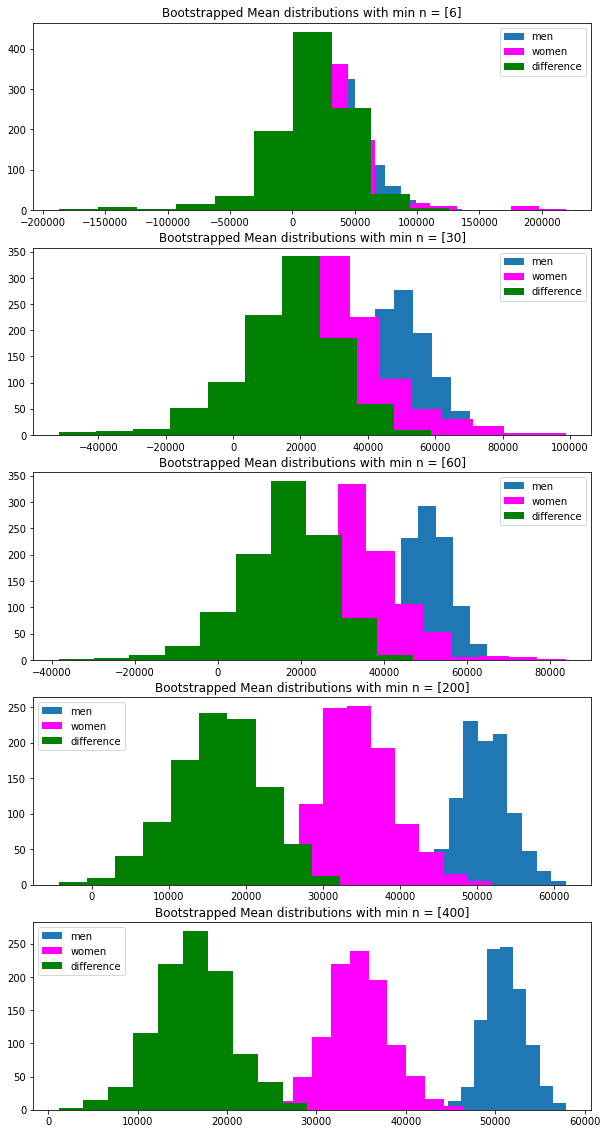

In [82]:
#Plotting the bootstrapped distributions

fig, axes = plt.subplots(len(n_woman), 1, figsize =(10,20) )

for i in range(len(n_woman)):
  axes[i].hist(bootstrap_man[i], label = "men")
  axes[i].hist(bootstrap_woman[i],label = "women", color = "magenta")
  axes[i].hist(bootstrap_man[i] - bootstrap_woman[i],label = "difference", color = "green")
  axes[i].legend()
  axes[i].set_title("Bootstrapped Mean distributions with min n = " + str(n_woman[i]))



From the bootstrapped distributions we see that at 6 samples, the distribution still appears bery left skewed and non normal. This non-normality is reduced with a sample size of 30-60, but the data is still noticeably left skewed. This disappears with the use of 200 samples 

In [83]:
#Confirming the mean and standard deviation are within expectation

for i in range(len(n_woman)):
  print("With sample_size = %d for men and %d for women, the distribution has the following parameters: \n" %(n_man[i],n_woman[i]))
  print("Men's salary mean: %.2f \nMen's salary stddev: %.2f" %(bootstrap_man[i].mean(), bootstrap_man[i].std()))
  print("Women's salary mean: %.2f \nWomen's salary stddev: %.2f" %(bootstrap_woman[i].mean(), bootstrap_woman[i].std()))
 
  print("Central limit theorem expectations:")
  print("CLT Men's salary mean: %.2f \nMen's salary stddev: %.2f" %(man_df.mean(), man_df.std()/math.sqrt(n_man[i])))
  print("CLT Women's salary mean: %.2f \nWomen's salary stddev: %.2f" %(woman_df.mean(), woman_df.std()/math.sqrt(n_woman[i])))
  print("\n \n")



With sample_size = 30 for men and 6 for women, the distribution has the following parameters: 

Men's salary mean: 50319.05 
Men's salary stddev: 17478.99
Women's salary mean: 35033.75 
Women's salary stddev: 28350.93
Central limit theorem expectations:
CLT Men's salary mean: 51193.60 
Men's salary stddev: 18253.63
CLT Women's salary mean: 34816.88 
Women's salary stddev: 29400.96

 

With sample_size = 150 for men and 30 for women, the distribution has the following parameters: 

Men's salary mean: 51335.38 
Men's salary stddev: 7998.30
Women's salary mean: 35370.55 
Women's salary stddev: 13468.67
Central limit theorem expectations:
CLT Men's salary mean: 51193.60 
Men's salary stddev: 8163.27
CLT Women's salary mean: 34816.88 
Women's salary stddev: 13148.51

 

With sample_size = 300 for men and 60 for women, the distribution has the following parameters: 

Men's salary mean: 50882.74 
Men's salary stddev: 5415.26
Women's salary mean: 34774.39 
Women's salary stddev: 9421.31
Centra

The bootstrapped data is within the expectations of the central limit theorem. The data can be visually verified to be normal for n = 200 +.
The two sample t-test shall now proceed using the n = 400 sample_size data.


To compare the variances in the data Bartlett's test is used as the data is not normal. The variance in the data is easily noted to be different, hence the standard Student's t test cannot be applied. Welch's t-test for unequal variances is applied instead.

In [84]:
stats.bartlett(bootstrap_man[-1].reshape(bootstrap_man[-1].shape[0],), bootstrap_woman[-1].reshape(bootstrap_woman[-1].shape[0],))

BartlettResult(statistic=187.81407853594465, pvalue=9.538600516658943e-43)

In [85]:
stats.ttest_ind(a =bootstrap_man[-1],  b =bootstrap_woman[-1], equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=array([123.02144324]), pvalue=array([0.]))

The p-value is close to 0, thus the probability that the observed data was generated under the null hypothesis (that the mean salary of men and women is equal) is almost 0. 

The null hypothes is rejected with the confidence level of 0.05. That is to say: the difference in the salary between men and women in the field is statistically different.


#Part 3 Comparing Salaries Based on Education

In [86]:
ba_df = man_df = df[df["Education"] == "Bachelor’s degree"]["Salary"]
ma_df = man_df = df[df["Education"] == "Master’s degree"]["Salary"]
phd_df = man_df = df[df["Education"] == "Doctoral degree"]["Salary"]

In [87]:
ba_df.describe()

count       4777.000000
mean       35578.291815
std        89382.060777
min         1000.000000
25%         1000.000000
50%         7500.000000
75%        40000.000000
max      1000000.000000
Name: Salary, dtype: float64

In [88]:
ma_df.describe()

count       6799.000000
mean       52706.868657
std        90928.786678
min         1000.000000
25%         3000.000000
50%        25000.000000
75%        70000.000000
max      1000000.000000
Name: Salary, dtype: float64

In [89]:
phd_df.describe()

count       2217.000000
mean       70641.181777
std       117160.947589
min         1000.000000
25%         4000.000000
50%        40000.000000
75%        90000.000000
max      1000000.000000
Name: Salary, dtype: float64

We see there are noticeable differences in the means and medicans of salaries by education level. The variance is similar in scale hence we anticipate that education level will have a significant impact, but cannot verify without proceeding with statistical testing.


Parameter|Bachelor's Salary|Masters's Salary|Doctor's Salary
---|---|---|---
count|4777| 6799| 2217
mean| 35578.29| 52706.87| 70641.18
std | 89382.06| 90928.79| 117160.95
min | 1000 | 1000| 1000
median| 7500| 25000| 40000
max | 1000000| 1000000| 1000000


##Analysis of Variance (ANOVA) - with Education as a variable

Analysis of variances (ANOVA) tests can be used to compare multiple groups at once. The operate on the null hypothesis that there is no difference between the parameter of interest (the mean in this case) betweeen the groups. That is to say, for this case they will be used to test if there is a statistical difference in salary between the selected education levels (Bachelor, Master, PhD).


As wih the t-test, the ANOVA tests require certain assumptions about the data to be valid. In fact the same requirements as Student's t-test:

*   The distributions being sampled from are normal
*   The samples used are randomly selected
*   The variance of the distributions being compared are similar

The variances are roughly on the same magnitude and within close distance (0.5 <= Var_i/Var_j <= 1.5). In addition the data was fairly "random".

However, while the graph of education level across genders was normally distributed, the graph of salaries by education level may not be. The graph shall be presented below.



In [90]:
#Look only at salaries for the education levels being considered
education_anova_list =  ["Bachelor’s degree","Master’s degree", "Doctoral degree" ]
education_df = df[df["Education"].isin(education_anova_list)][["Education","Salary"]]

In [91]:
education_df.head(10)

,Education,Salary
0,Bachelor’s degree,30000
1,Master’s degree,70000
2,Master’s degree,1000
3,Doctoral degree,40000
4,Doctoral degree,40000
5,Bachelor’s degree,20000
7,Doctoral degree,80000
8,Master’s degree,3000
9,Bachelor’s degree,1000
10,Doctoral degree,15000


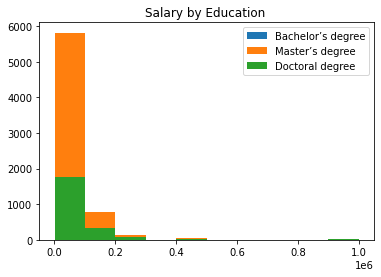

In [92]:
for level in education_anova_list:
  plt.hist(education_df[ education_df["Education"] == level]["Salary"], label = level)


plt.title("Salary by Education ")
plt.legend()
plt.show()

As with the spread by gender, the distribution of salaries when split by education is not normal. It follows a similar lognormal or Gamma distribution form with significant outliers such that the deviation from normality cannot be easily ignored.

Hence the data must be transformed in order to proceed with the ANOVA test.



In [93]:
stats.levene(ba_df, ma_df)

LeveneResult(statistic=70.90066139214565, pvalue=4.1984726902509736e-17)

In [94]:
stats.levene(ba_df, phd_df)

LeveneResult(statistic=133.64824652572224, pvalue=1.2370733077812242e-30)

In [95]:
stats.levene(phd_df, ma_df)

LeveneResult(statistic=43.18615021586614, pvalue=5.2529536106722515e-11)

In [96]:
stats.levene(ba_df, ma_df, phd_df)

LeveneResult(statistic=79.54751302920215, pvalue=4.47423511714484e-35)

## Bootstrapping a Mean Distribution

In [97]:
#Bootstrapping

#set of sample sizes to use for Doctoral Degrees (the smallest educational group)
n_phd = np.array([6, 30, 60, 200, 400])
n_phd = n_phd.reshape(len(n_phd),1)

#calculation of sample sizes for men
n_ba = n_phd * int(ba_df.count()/phd_df.count())
n_ma = n_phd * int(ma_df.count()/phd_df.count())

#lists to hold the arrays of 
bootstrap_ba = list()
bootstrap_ma = list()
bootstrap_phd = list()

#Create the bootstapped distributions

for i in range(len(n_phd)):
  temp = bootstrapDist(data =ba_df, sample_size = n_ba[i], replications = 1000)
  bootstrap_ba.append(temp)
  temp = bootstrapDist(data =ma_df, sample_size = n_ma[i], replications = 1000)
  bootstrap_ma.append(temp)
  temp = bootstrapDist(data =phd_df, sample_size = n_phd[i], replications = 1000)
  bootstrap_phd.append(temp)



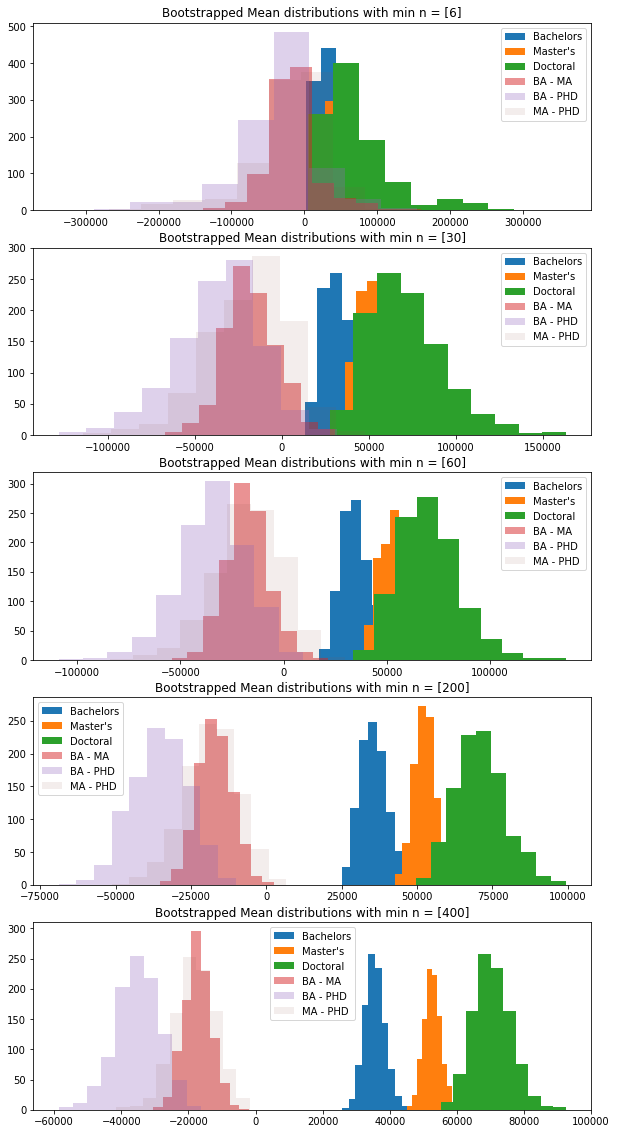

In [98]:
#Plotting the bootstrapped distributions

fig, axes = plt.subplots(len(n_phd), 1, figsize =(10,20) )

for i in range(len(n_phd)):
  axes[i].hist(bootstrap_ba[i],label = "Bachelors")
  axes[i].hist(bootstrap_ma[i], label = "Master's")
  axes[i].hist(bootstrap_phd[i],label = "Doctoral")
  axes[i].hist(bootstrap_ba[i] - bootstrap_ma[i],label = "BA - MA", alpha = 0.5)
  axes[i].hist(bootstrap_ba[i] - bootstrap_phd[i],label = "BA - PHD", alpha = 0.3)
  axes[i].hist(bootstrap_ma[i] - bootstrap_phd[i],label = "MA - PHD", alpha = 0.1)
  axes[i].legend()
  axes[i].set_title("Bootstrapped Mean distributions with min n = " + str(n_phd[i]))



In [99]:
stats.bartlett(bootstrap_ma[-1].reshape(bootstrap_ma[-1].shape[0],),\
             bootstrap_phd[-1].reshape(bootstrap_phd[-1].shape[0],))

BartlettResult(statistic=603.2511570282235, pvalue=3.285864621271487e-133)

In [100]:
stats.bartlett(bootstrap_ba[-1].reshape(bootstrap_ma[-1].shape[0],),\
             bootstrap_phd[-1].reshape(bootstrap_phd[-1].shape[0],))

BartlettResult(statistic=363.1924303505125, pvalue=5.681327616909179e-81)

In [101]:
stats.bartlett(bootstrap_ba[-1].reshape(bootstrap_ba[-1].shape[0],),\
             bootstrap_ma[-1].reshape(bootstrap_ma[-1].shape[0],))

BartlettResult(statistic=37.88054606873005, pvalue=7.52114953449531e-10)

In [102]:
#Now to test the statistical significance...

stats.f_oneway(ba_df, ma_df, phd_df)

F_onewayResult(statistic=109.75776160573479, pvalue=5.107696325253651e-48)

As anticipated from the graphs, the p-value is almost 0. The null hypothesis that there is no difference in mean salary when categorized by education level is rejected.


#Further Thoughts

These results may be biased towards India and the United States due to their domination of the dataset responses. For future it may be preferable to look at data from each country individually to see if the above results hold true in general.

This may also be more relevant as looking at the salaries of people in countries with similar costs of living would b more useful for making decisions for those people. The use of the global/(US & India) salary range may not reflect the realities in the other countries.